# 100本　第6章

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from dateutil.relativedelta import relativedelta

In [44]:
import networkx as nx

## ノック51:物流に関するデータを読み込み

In [9]:
factories = pd.read_csv('tbl_factory.csv')
print(len(factories))
factories.head()

8


,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北


In [8]:
warehouses = pd.read_csv('tbl_warehouse.csv')
print(len(warehouses))
warehouses.head()

6


,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北


In [7]:
cost = pd.read_csv('rel_cost.csv')
print(len(cost))
cost.head()

24


,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8


In [6]:
trans = pd.read_csv('tbl_transaction.csv')
print(len(trans))
trans.head()

4000


,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30


In [12]:
join_data = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8


In [13]:
join_data = pd.merge(join_data, factories, left_on='ToFC', right_on='FCID', how='left')
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,横須賀工場,25,関東
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,那須工場,25,東北
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,山形工場,30,東北
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,木更津工場,29,関東
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,東京工場,28,関東


In [17]:
join_data = pd.merge(join_data, warehouses, left_on='FromWH', right_on='WHID', how='left')
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID_x,Cost,FCID_y,FCName,FCDemand,FCRegion,WHID_y,WHName,WHSupply,WHRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,横須賀工場,25,関東,WH00003,豊洲倉庫,42,関東
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,那須工場,25,東北,WH00006,山形倉庫,65,東北
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,山形工場,30,東北,WH00004,郡山倉庫,60,東北
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,木更津工場,29,関東,WH00003,豊洲倉庫,42,関東
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,東京工場,28,関東,WH00002,品川倉庫,41,関東


In [ ]:
del join_data['FCID_x']
del join_data['WHID_x']

In [24]:
join_data.rename(columns={'FCID_y':'FCID', 'WHID_y':'WHID'})
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,Cost,FCID_y,FCName,FCDemand,FCRegion,WHID_y,WHName,WHSupply,WHRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,1.1,FC00004,横須賀工場,25,関東,WH00003,豊洲倉庫,42,関東
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,1.3,FC00007,那須工場,25,東北,WH00006,山形倉庫,65,東北
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,0.9,FC00006,山形工場,30,東北,WH00004,郡山倉庫,60,東北
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,1.6,FC00002,木更津工場,29,関東,WH00003,豊洲倉庫,42,関東
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,0.8,FC00001,東京工場,28,関東,WH00002,品川倉庫,41,関東


In [25]:
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [32]:
kanto = join_data.loc[join_data['WHRegion'] == '関東']
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [33]:
tohoku = join_data.loc[join_data['WHRegion'] == '東北']
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


## ノック52:現状の輸送量、コストを確認

In [34]:
print('関東支社の総コスト：' + str(kanto['Cost'].sum()) + '万円')
print('東北支社の総コスト：' + str(tohoku['Cost'].sum()) + '万円')

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [36]:
print('関東支社の総部品輸送個数：' + str(kanto['Quantity'].sum()) + '個')
print('東北支社の総部品輸送個数：' + str(tohoku['Quantity'].sum()) + '個')

関東支社の総部品輸送個数：49146個
東北支社の総部品輸送個数：50214個


In [38]:
print('関東支社の部品1つ当たり輸送コスト：' + str(int((kanto['Cost'].sum() / kanto['Quantity'].sum()) * 10000)) + '円')
print('東北支社の部品1つ当たり輸送コスト：' + str(int((tohoku['Cost'].sum() / tohoku['Quantity'].sum()) * 10000)) + '円')

関東支社の部品1つ当たり輸送コスト：445円
東北支社の部品1つ当たり輸送コスト：410円


In [41]:
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
cost_chk.head()

,RCostID,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,1,FC00001,WH00001,0.4,東京工場,28,関東
1,2,FC00001,WH00002,0.8,東京工場,28,関東
2,3,FC00001,WH00003,1.5,東京工場,28,関東
3,4,FC00002,WH00001,0.9,木更津工場,29,関東
4,5,FC00002,WH00002,0.8,木更津工場,29,関東


In [42]:
print('東京支社の平均輸送コスト：' + str(cost_chk['Cost'].loc[cost_chk['FCRegion'] == '関東'].mean()) + '万円')
print('東北支社の平均輸送コスト：' + str(cost_chk['Cost'].loc[cost_chk['FCRegion'] == '東北'].mean()) + '万円')

東京支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


## ノック53:ネットワークを可視化

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


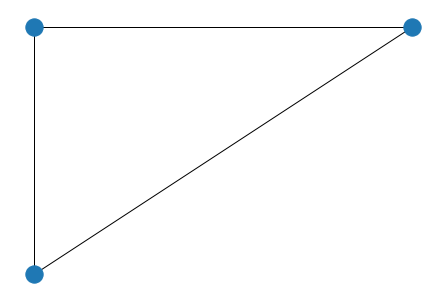

In [45]:
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

# 辺の設定
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

# 座標の設定
pos={}
pos['nodeA']=(0, 0)
pos['nodeB']=(1, 1)
pos['nodeC']=(0, 1)

# 描画
nx.draw(G,pos)
plt.show()

## ノック54:ネットワークにノードを追加

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


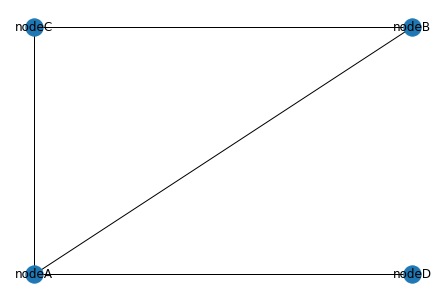

In [46]:
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')
G.add_node('nodeD')

# 辺の設定
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')
G.add_edge('nodeA', 'nodeD')

# 座標の設定
pos={}
pos['nodeA']=(0, 0)
pos['nodeB']=(1, 1)
pos['nodeC']=(0, 1)
pos['nodeD']=(1, 0)

# 描画
nx.draw(G,pos, with_labels=True)
plt.show()

## ノック55:ルートの重みづけ

In [47]:
df_w = pd.read_csv('network_weight.csv')
df_w.head()

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [48]:
df_p = pd.read_csv('network_pos.csv')
df_p.head()

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


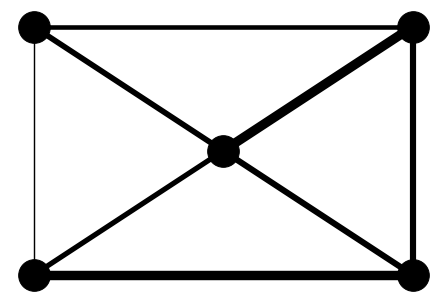

In [54]:
# エッジの重みのリスト化
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

# 辺の設定
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

# 座標の設定
pos={}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

# 描画
nx.draw(G,pos, with_labels=True, front_size=16, node_size=1000, node_color='k', front_color='w', width=edge_weights)
plt.show()

## ノック56:輸送ルート情報を読み込み

## ノック57:輸送ルート情報からネットワークを可視化

## ノック58:輸送コスト関数を作成

## ノック59:制約条件を作る

## ノック60:輸送ルートを変更し、輸送コスト関数の変化